In [63]:
import pandas as pd
import numpy as np
from km import KMeans
from SVD import Matrix
import matplotlib.pyplot as plt
import math

In [64]:
def load_data(file_path):
    return pd.read_csv(file_path)


In [65]:
file_path = "./EncodedCombined2.csv"  # Replace with your dataset file path
data = load_data(file_path)

avg_rating = load_data("./Genre_Rating.csv")
# Assuming the data matrix is constructed with users as rows and movies as columns
data_matrix = data  # Exclude first column (user IDs)
# data_matrix.drop(columns=["Zip-code","Title"],inplace=True)
print(data_matrix)


        UserID  MovieID  Rating  Action  Adventure  Animation  Children's  \
0            1     1193       5       0          0          0           0   
1            1      661       3       0          0          1           1   
2            1      914       3       0          0          0           0   
3            1     3408       4       0          0          0           0   
4            1     2355       5       0          0          1           1   
...        ...      ...     ...     ...        ...        ...         ...   
817057    3537     3830       1       0          0          0           0   
817058    3537     3626       1       0          0          0           0   
817059    3537     3721       1       0          0          0           0   
817060    3537     2773       1       0          0          0           0   
817061    3537     3800       1       0          0          0           0   

        Comedy  Crime  Documentary  ...  Musical  Mystery  Romance  Sci-Fi 

In [66]:
newUserID=7000
newUserMovies={
    25 : 4.0,
    54 : 5.0,
    65: 3.0,
    1200 : 4.0,
    3200 : 5.0,
    2980 : 1.0,
    99 : 2.0,
    455 : 2.0 
}
newUserDetails = {
    'Age' : 18,
    'Gender' : 0,
    'Occupation' : 17
}


movieDetails=pd.read_csv("movies.csv")
movieDetails=movieDetails.set_index(keys='MovieID')
columns = ["UserID","MovieID","Rating","Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical",
"Mystery","Romance","Sci-Fi","Thriller","War","Western" , "Gender", "Age", "Occupation"]

Rows=[]
for movieId,Rating in newUserMovies.items():
    newRow={}
    movie=movieDetails.loc[movieId]
    genres = movie['Genres'].split('|')
    newRow["UserID"]=newUserID
    newRow["MovieID"]=movieId
    newRow["Rating"]=Rating
    for genre in genres:
        newRow[genre]=int(1)
    for key, value in newUserDetails.items():
        newRow[key]=int(value)
    Rows.append(newRow)

newUserdf=pd.DataFrame(Rows,columns=columns)
newUserdf=newUserdf.fillna(int(0))

data_matrix=pd.concat([data_matrix,newUserdf])
data_matrix=data_matrix.drop_duplicates()
data_matrix

,UserID,MovieID,Rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender,Age,Occupation
0,1,1193,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,10
1,1,661,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,10
2,1,914,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,10
3,1,3408,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,10
4,1,2355,5.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,7000,1200,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,18,17
4,7000,3200,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18,17
5,7000,2980,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18,17
6,7000,99,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18,17


In [67]:
# Convert MovieID and UserID to int16
data_matrix["MovieID"] = data_matrix["MovieID"].astype(np.int16)
data_matrix["UserID"] = data_matrix["UserID"].astype(np.int16)
for col in data_matrix.columns:
    if col != "MovieID" and col != "UserID":
        data_matrix[col] = data_matrix[col].astype(np.int8)
print(data_matrix.dtypes)

UserID         int16
MovieID        int16
Rating          int8
Action          int8
Adventure       int8
Animation       int8
Children's      int8
Comedy          int8
Crime           int8
Documentary     int8
Drama           int8
Fantasy         int8
Film-Noir       int8
Horror          int8
Musical         int8
Mystery         int8
Romance         int8
Sci-Fi          int8
Thriller        int8
War             int8
Western         int8
Gender          int8
Age             int8
Occupation      int8
dtype: object


In [68]:
df=data_matrix
# Initialize an empty dictionary to store genre-wise ratings for each user
genre_ratings = {}
genres = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    user_id = row['UserID']
    rating = row['Rating']
    # Iterate over each genre and update the genre_ratings dictionary
    for genre in genres:
        if genre not in genre_ratings:
            genre_ratings[genre] = {}
        if user_id not in genre_ratings[genre]:
            genre_ratings[genre][user_id] = {'total_rating': 0, 'count': 0}
        if row[genre] == 1:  # Check if the movie belongs to the genre
            genre_ratings[genre][user_id]['total_rating'] += rating
            genre_ratings[genre][user_id]['count'] += 1

# Initialize an empty dictionary to store the final DataFrame values
data = {}

# Iterate over each user and calculate the average rating for each genre
for user_id in set(df['UserID']):
    user_data = {}
    for genre, values in genre_ratings.items():
        if user_id in values and values[user_id]['count']>0:
            user_data[genre] = values[user_id]['total_rating'] / values[user_id]['count']
        else:
            user_data[genre] = np.nan
    data[user_id] = user_data

# Create the final DataFrame
result_df = pd.DataFrame.from_dict(data, orient='index')

In [69]:
data_mat=result_df
data_mat=data_mat.sort_index()
data_mat

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,NaN,4.428571,4.000000,NaN,NaN,4.285714,NaN,3.666667,4.333333,3.666667,5.000000,NaN
2,3.500000,3.736842,NaN,NaN,3.560000,3.583333,NaN,3.898734,3.000000,4.000000,3.000000,NaN,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
3,3.956522,4.000000,4.000000,4.000000,3.766667,NaN,NaN,4.000000,4.500000,NaN,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
5,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,NaN,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000
6,4.000000,3.750000,4.222222,3.875000,3.750000,3.000000,NaN,3.727273,3.000000,NaN,NaN,4.315789,NaN,4.000000,3.500000,3.666667,4.000000,3.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,2.634921,3.000000,3.250000,2.035714,2.246154,3.150000,NaN,3.116071,3.083333,3.000000,2.333333,1.500000,3.300000,3.047619,2.762500,1.972973,3.307692,2.333333
6036,3.000000,2.987952,3.911765,3.444444,3.203065,3.528302,3.909091,3.505376,3.000000,4.058824,2.986486,3.709677,3.411765,3.352459,2.834320,3.142857,3.785714,3.642857
6037,3.642857,4.000000,4.000000,3.666667,3.576271,3.833333,4.000000,3.877551,4.250000,3.444444,4.111111,4.000000,3.692308,3.681818,3.692308,3.705882,4.000000,3.750000
6040,2.976190,2.818182,3.000000,4.000000,3.274510,3.920000,4.500000,3.821622,3.500000,4.000000,2.590909,4.000000,4.454545,3.488889,3.473684,3.926829,3.695652,4.000000


In [70]:
user_ids = set(df['UserID'])
user_ids=sorted(user_ids)
user_ids

[1,
 2,
 3,
 5,
 6,
 8,
 9,
 10,
 11,
 13,
 15,
 17,
 18,
 19,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 33,
 35,
 36,
 37,
 38,
 39,
 42,
 44,
 45,
 48,
 49,
 52,
 56,
 57,
 58,
 59,
 60,
 62,
 63,
 65,
 67,
 68,
 69,
 70,
 73,
 75,
 76,
 78,
 82,
 83,
 87,
 88,
 90,
 92,
 93,
 96,
 97,
 99,
 100,
 101,
 102,
 103,
 105,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 126,
 127,
 129,
 130,
 131,
 132,
 135,
 136,
 137,
 138,
 139,
 140,
 143,
 146,
 147,
 148,
 149,
 150,
 151,
 155,
 156,
 157,
 161,
 162,
 163,
 165,
 166,
 167,
 169,
 170,
 174,
 175,
 176,
 178,
 180,
 181,
 182,
 183,
 186,
 187,
 188,
 190,
 192,
 193,
 194,
 195,
 198,
 199,
 201,
 202,
 203,
 204,
 205,
 208,
 210,
 212,
 214,
 216,
 218,
 220,
 222,
 223,
 224,
 225,
 229,
 230,
 231,
 232,
 233,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 244,
 245,
 249,
 251,
 252,
 253,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 265,
 267,
 268,
 270,
 271,
 273,
 274,

In [71]:
def get_non_zero_eigenvalues(Sigma):
    # Extract diagonal elements of Sigma
    diagonal_elements = np.diag(Sigma)

    # Filter out values not close to zero
    non_zero_eigenvalues = [eigenvalue for eigenvalue in diagonal_elements if not math.isclose(eigenvalue, 0)]

    return non_zero_eigenvalues


In [72]:
avg_rating

,Genre,Avg. Rating
0,Horror,3.215013
1,Children's,3.422035
2,Fantasy,3.447371
3,Sci-Fi,3.466521
4,Adventure,3.477257
5,Action,3.491185
6,Comedy,3.522099
7,Thriller,3.570466
8,Romance,3.607465
9,Western,3.637770


In [73]:
avgdict = avg_rating.set_index('Genre')['Avg. Rating'].to_dict()
avg_dict = {key: float(value)  for key, value in avgdict.items() if value != 'Avg. Rating'}


A_mat = data_mat
A_watched=data_matrix.pivot(index='UserID', columns='MovieID', values='Rating')
# print(avg_dict)
A_mat= A_mat.fillna(avg_dict)
A_np=A_mat.values
A_np

array([[4.2       , 4.        , 4.11111111, ..., 3.66666667, 5.        ,
        3.63777015],
       [3.5       , 3.73684211, 3.68486822, ..., 3.48387097, 3.73333333,
        4.33333333],
       [3.95652174, 4.        , 4.        , ..., 3.8       , 4.        ,
        4.66666667],
       ...,
       [3.64285714, 4.        , 4.        , ..., 3.70588235, 4.        ,
        3.75      ],
       [2.97619048, 2.81818182, 3.        , ..., 3.92682927, 3.69565217,
        4.        ],
       [4.        , 2.        , 3.68486822, ..., 4.        , 4.        ,
        3.63777015]])

In [74]:
A_mat=A_mat.round(2)
# print(A_mat.dtypes)
A_mat

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,4.20,4.00,4.11,4.25,4.14,4.00,3.93,4.43,4.00,4.08,3.22,4.29,3.67,3.67,4.33,3.67,5.00,3.64
2,3.50,3.74,3.68,3.42,3.56,3.58,3.93,3.90,3.00,4.00,3.00,3.67,3.33,3.71,3.59,3.48,3.73,4.33
3,3.96,4.00,4.00,4.00,3.77,3.71,3.93,4.00,4.50,4.08,2.67,4.00,3.00,3.80,3.83,3.80,4.00,4.67
5,2.61,3.00,4.00,3.83,3.41,3.29,3.67,3.10,3.45,4.00,2.80,3.33,3.12,3.10,3.07,2.85,3.50,4.00
6,4.00,3.75,4.22,3.88,3.75,3.00,3.93,3.73,3.00,4.08,3.22,4.32,3.67,4.00,3.50,3.67,4.00,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,2.63,3.00,3.25,2.04,2.25,3.15,3.93,3.12,3.08,3.00,2.33,1.50,3.30,3.05,2.76,1.97,3.31,2.33
6036,3.00,2.99,3.91,3.44,3.20,3.53,3.91,3.51,3.00,4.06,2.99,3.71,3.41,3.35,2.83,3.14,3.79,3.64
6037,3.64,4.00,4.00,3.67,3.58,3.83,4.00,3.88,4.25,3.44,4.11,4.00,3.69,3.68,3.69,3.71,4.00,3.75
6040,2.98,2.82,3.00,4.00,3.27,3.92,4.50,3.82,3.50,4.00,2.59,4.00,4.45,3.49,3.47,3.93,3.70,4.00


In [75]:
A = Matrix(A_mat)
U,Sigma,V = A.svd()

non_zero_diag = get_non_zero_eigenvalues(Sigma)
print("This is nonzero diag")
print(non_zero_diag)
U_red,Sigma_red,V_red = A.randomized_svd(len(non_zero_diag))  # Number of components for SVD 

[9.24308164e+05 2.30394329e+03 2.03174246e+03 1.64828545e+03
 1.37000840e+03 1.27018157e+03 1.13350991e+03 1.00722859e+03
 9.31972090e+02 7.02690304e+02 6.24281710e+02 5.69073457e+02
 4.55735079e+02 3.29235289e+02 2.71727376e+02 1.73362306e+02
 1.65358186e+02 1.45527115e+02]

Outputs

This is nonzero diag
[961.4094675564069, 47.999409311454286, 45.07485395377789, 40.59908194504649, 37.01362446121389, 35.639606699555976, 33.66763888733739, 31.736864913683913, 30.528217926332026, 26.508306319630968, 24.98563007548744, 23.85526057807316, 21.347952567379483, 18.144841934017542, 16.4841553042209, 13.166712040460624, 12.859167392132237, 12.063461986133825]
[9.24308164e+05 2.30394329e+03 2.03174246e+03 1.64828545e+03
 1.37000840e+03 1.27018157e+03 1.13350991e+03 1.00722859e+03
 9.31972090e+02 7.02690304e+02 6.24281710e+02 5.69073458e+02
 4.55735079e+02 3.29235289e+02 2.71727376e+02 1.73362306e+02
 1.65358186e+02 1.45527115e+02]

Outputs



In [76]:
np.savetxt('U_red_Kmeans.txt', U_red)
np.savetxt('Sigma_red_Kmeans.txt', Sigma_red)
np.savetxt('V_red_Kmeans.txt', V_red)

In [77]:
U_red = np.loadtxt('U_red_Kmeans.txt')
Sigma_red = np.loadtxt('Sigma_red_Kmeans.txt')
V_red = np.loadtxt('V_red_Kmeans.txt')
print(U_red.shape)
print(Sigma_red.shape)
print(V_red.shape)

(3744, 18)
(18, 18)
(18, 18)


In [78]:
def elbow_method(data, max_clusters=4 , skip_factor=1):
    distortions = []
    # Generate x-axis values with skip_factor increments
    x_values = range(skip_factor, max_clusters + 1, skip_factor)
    for i in x_values:
        km = KMeans(i)
        km.fit(data)
        distortions.append(km.get_cost())  # km.inertia_ gives the distortion (cost)
    # Plotting the elbow curve
    plt.plot(x_values, distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')

new_mat = U_red
new_mat
# Assuming your data is in V_red_T
# Perform Elbow Method


array([[ 0.01782301,  0.01557269, -0.00324472, ...,  0.02261527,
         0.00298825, -0.02565377],
       [ 0.01599256, -0.00139236, -0.00187493, ...,  0.00641994,
        -0.01468765,  0.00014874],
       [ 0.01710045,  0.01796254, -0.01262025, ...,  0.00353587,
        -0.00366921, -0.00667776],
       ...,
       [ 0.01687309,  0.01052901, -0.01277431, ...,  0.00296522,
        -0.01488838,  0.00964664],
       [ 0.01608597, -0.0062447 ,  0.01383409, ..., -0.00739218,
        -0.01557126,  0.01916338],
       [ 0.01566989,  0.00471562, -0.01808464, ..., -0.0449225 ,
         0.09964024, -0.01393147]])

sample_points_ids
[2669, 3119, 1177]
the tuples
(0.014828410923964702, -0.00512614547901297, 0.0020415023956654797, -0.0062915011810949556, -0.006703810664248537, 0.01623079522761729, -0.014960618083806786, 0.00197635143509881, 0.011628177586350352, -0.0039646662324321095, -0.0004003759223611846, 0.003887394898645186, 0.0027073266663339107, -0.0013413907397252884, -0.0003668325742111946, -0.0037395122573708407, -0.014621706146697052, -0.005373632621376211)
Distance Matrix
[[0.07220846 0.07237517 0.07724416]
 [0.05064344 0.06130331 0.05904526]
 [0.05929176 0.05523199 0.06649014]
 ...
 [0.05113782 0.08891972 0.05580624]
 [0.07353221 0.11623591 0.07381225]
 [0.15383851 0.16852587 0.13980014]]
closest
[0 0 1 ... 0 0 2]
Distance Matrix
[[0.05903204 0.05279592 0.06228717]
 [0.0360581  0.04061046 0.04196208]
 [0.04778558 0.03630094 0.0529779 ]
 ...
 [0.04051875 0.06327516 0.04349328]
 [0.07188401 0.09306922 0.07198039]
 [0.14857327 0.1543257  0.14031035]]
closest
[1 0 1 ... 0 0 2]
Distance Ma

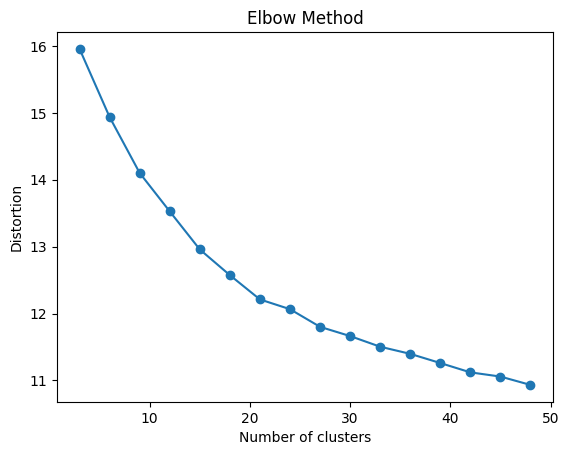

In [79]:
elbow_method(U_red,50,3)

In [80]:
km = KMeans(50)
km.fit(U_red)

sample_points_ids
[765, 3667, 3198, 1025, 3011, 1256, 1866, 1724, 2605, 2178, 446, 593, 2144, 3121, 955, 1825, 2423, 3353, 3618, 470, 1805, 1195, 1431, 3406, 3239, 441, 301, 1598, 2710, 2493, 762, 1122, 978, 295, 586, 1445, 1544, 2331, 1944, 2273, 3554, 1917, 2416, 452, 1776, 2302, 428, 1187, 1850, 726]
the tuples
(0.015859821087071447, 0.010000414435454201, -0.013496004481598876, -0.005617489188651324, -0.039003628402392757, 0.0025612433413951443, 0.007555870896819619, -0.022739394531127506, -0.014710913860545264, -0.0021447383305293116, 0.02304197186420196, -0.0014481093198899513, -0.001455276826259476, -0.0405367068085377, -0.02474198548261624, 0.04609396414994854, -0.01889377768518057, 0.03043136243953795)
Distance Matrix
[[0.11709266 0.06934091 0.0661185  ... 0.08236668 0.12860983 0.05960344]
 [0.09542895 0.0486981  0.07412451 ... 0.0609618  0.10439424 0.03633388]
 [0.10383924 0.06048072 0.07340438 ... 0.05540132 0.11596213 0.04987693]
 ...
 [0.08349418 0.0495734  0.08844274 ... 0

In [81]:
# Recommend movies for a particular user
def recommend_movies(user_id, data, users_watched,user_idx,cluster_labels):
    user_cluster = cluster_labels[user_idx[user_id]]
    # print(user_cluster)
    cluser_users = []
    index = []
    for row,cluster in cluster_labels.items():
        # if cluster == user_cluster and row!=user_idx[user_id]:
        if cluster == user_cluster:
            cluser_users.append(users_watched.iloc[row])
            # index.append(users_watched.index[row])
            index.append(row) 

    rating_movie = {}
    movie_rating_count={}
    for df in cluser_users:
        for key,value in df[df.notnull()].items():
            if int(key) not in rating_movie:
                rating_movie[int(key)] = 0
                movie_rating_count[int(key)] = 0
            
            rating_movie[int(key)]+=float(value)
            movie_rating_count[int(key)]+=1

    for key,value in movie_rating_count.items():
        if(value>0):
            rating_movie[key]=rating_movie[key]/float(value)

    final_list = sorted(rating_movie.items(), key=lambda x: x[1],reverse=True)

    movies=pd.read_csv("movies.csv")
    movies=movies.set_index(keys=['MovieID'])
    recommendations=[]
    for x in final_list:
        movie=movies.loc[x[0]]
        recommendations.append([x[0],x[1],movie['Title'],movie['Genres']])

    return recommendations

In [82]:
cluster_labels = km.get_pointCluster()

user_index = {}
i =0
for x in user_ids:
    user_index[int(x)] = i 
    i+=1

print(f"Cluster Labels: {cluster_labels}")
print(f"User_Index : {user_index}")
# User ID for which we want to recommend movies
user_id = newUserID  # Replace with the desired user ID

# Recommend movies for the user
recommended_movies = recommend_movies(user_id, new_mat,A_watched,user_index,cluster_labels)
print("Recommended movies for User", user_id)
for movie in recommended_movies[:5]:  # Display top 10 recommended movies
    print(f"Title : {movie[2]} , MovieID : {movie[0]} , Rating : {movie[1]} , Genres : {movie[3]}")  # Assuming the first column is movie titles


Cluster Labels: {0: 42, 1: 30, 2: 45, 3: 16, 4: 21, 5: 33, 6: 35, 7: 10, 8: 26, 9: 1, 10: 19, 11: 16, 12: 13, 13: 43, 14: 16, 15: 17, 16: 47, 17: 14, 18: 7, 19: 7, 20: 42, 21: 45, 22: 41, 23: 7, 24: 1, 25: 23, 26: 16, 27: 18, 28: 49, 29: 45, 30: 10, 31: 14, 32: 14, 33: 3, 34: 48, 35: 2, 36: 16, 37: 12, 38: 39, 39: 16, 40: 40, 41: 41, 42: 8, 43: 43, 44: 15, 45: 31, 46: 30, 47: 47, 48: 15, 49: 16, 50: 8, 51: 20, 52: 47, 53: 35, 54: 30, 55: 30, 56: 30, 57: 39, 58: 49, 59: 24, 60: 2, 61: 47, 62: 9, 63: 3, 64: 47, 65: 39, 66: 24, 67: 13, 68: 30, 69: 45, 70: 12, 71: 31, 72: 10, 73: 12, 74: 33, 75: 31, 76: 42, 77: 21, 78: 5, 79: 39, 80: 49, 81: 11, 82: 49, 83: 38, 84: 5, 85: 30, 86: 42, 87: 20, 88: 32, 89: 1, 90: 4, 91: 39, 92: 12, 93: 5, 94: 43, 95: 12, 96: 24, 97: 16, 98: 12, 99: 42, 100: 5, 101: 25, 102: 14, 103: 18, 104: 45, 105: 12, 106: 33, 107: 49, 108: 37, 109: 1, 110: 28, 111: 7, 112: 39, 113: 20, 114: 23, 115: 17, 116: 14, 117: 3, 118: 0, 119: 1, 120: 43, 121: 18, 122: 2, 123: 16, 1

In [83]:
df=A_watched.loc[user_id]
result_map = {}

for key,value in df[df.notnull()].items():
    result_map[key] = value

movies=pd.read_csv("movies.csv")
movies=movies.set_index(keys=['MovieID'])
result_map=dict(sorted(result_map.items(), key=lambda item: item[1],reverse=True))

movies_currently_watched=[]
for movieID,rating in result_map.items():
    movie=movies.loc[movieID]
    movies_currently_watched.append([movieID,rating,movie['Title'],movie['Genres']])

print("Movies Watched by User :", user_id)
for movie in movies_currently_watched:  # Display top 10 recommended movies
    print(f"Title : {movie[2]} , MovieID : {movie[0]} , Rating : {movie[1]} , Genres : {movie[3]}")  # Assuming the first column is movie titles

Movies Watched by User : 7000
Title : Big Green, The (1995) , MovieID : 54 , Rating : 5.0 , Genres : Children's|Comedy
Title : Last Detail, The (1973) , MovieID : 3200 , Rating : 5.0 , Genres : Comedy|Drama
Title : Leaving Las Vegas (1995) , MovieID : 25 , Rating : 4.0 , Genres : Drama|Romance
Title : Aliens (1986) , MovieID : 1200 , Rating : 4.0 , Genres : Action|Sci-Fi|Thriller|War
Title : Bio-Dome (1996) , MovieID : 65 , Rating : 3.0 , Genres : Comedy
Title : Heidi Fleiss: Hollywood Madam (1995) , MovieID : 99 , Rating : 2.0 , Genres : Documentary
Title : Free Willy (1993) , MovieID : 455 , Rating : 2.0 , Genres : Adventure|Children's|Drama
Title : Men Cry Bullets (1997) , MovieID : 2980 , Rating : 1.0 , Genres : Drama
